In [518]:
from sklearn import model_selection
import numpy as np
import pandas as pd

In [519]:
def ReadExcel(pathname):
    df=pd.read_excel(pathname,sheet_name="Sheet1")
    arr=np.array(df)
    rows=np.shape(arr)[0]
    for i in range(rows):
        if arr[i][3]=='是':
            arr[i][3]=1
        else:
            arr[i][3]=0
    dataArr=arr[:,1:3]# 只要中间两列数据
    labelArr=arr[:,-1]# 仅最后一列
    labelArr=labelArr.reshape(17,1)
    return dataArr,labelArr

In [520]:
def plot(X,y):
    dataset=np.c_[X,y]
    f1 = plt.figure(1)
    plt.title('watermelon_3a')
    plt.xlabel('density')
    plt.ylabel('ratio_sugar')
    
    y=dataset[:,-1]
    plt.scatter(dataset[y==1,0], dataset[y==1,1], marker='o', color='g', s=100, label='good')
    plt.scatter(dataset[y==0,0], dataset[y==0,1], marker='o', color='k', s=100, label='bad')
    plt.legend(loc='upper right')

In [521]:
def sigmoid(z):
    z=np.mat(z,dtype=float)
    # 否则'float' object has no attribute 'exp'
    
    return 1.0/(1+np.exp(-z))

In [526]:
#看起来更接近二次函数，so添加二次项
def fit_double(X,y,eta=0.01,n_iters=500000,eps=1e-8):
    # 注意是wx+b，要多一行
    b=np.ones((len(X),1))

    # 按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。
    data=np.c_[b,X]
    
    # 计算密度的平方
    x2=np.square(data[:,[1]])
    # 添加密度平方项
    data=np.c_[data,x2]
    
    beta=np.ones((4,1))
    i_iters=0
    
    while i_iters<n_iters :
        y_sig=sigmoid(data.dot(beta))
        m=y_sig-y  #计算误差值
        beta=beta-data.transpose().dot(m)*eta   #误差反传更新参数
        i_iters+=1
        
    #打印最后的误差值
    print(np.abs(m).sum())
    
    return beta,data

In [527]:
def plot_pre(X,y,w):
    y=y.reshape(1,17)
    plt.scatter(X[:, 1], X[:, 2], c=np.squeeze(y), cmap=plt.cm.Spectral)
    
    x_plt=np.linspace(0,1,100)
    x_double=x_plt*x_plt
    y_plt=-(w[1]*x_plt+w[0]+w[3]*x_double)/w[2]
    y_plt=y_plt.reshape(100,1)
    plt.ylim(0., 0.5)

    plt.plot(x_plt,y_plt)

    plt.xlabel('密度')
    plt.ylabel('含糖率')
    plt.show()

4.415648419028654


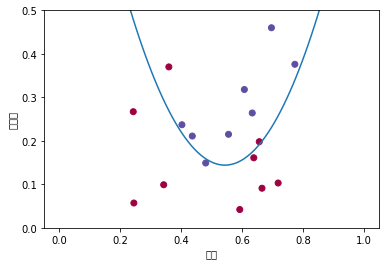

In [528]:
if __name__ == '__main__':
    X,y=ReadExcel('./alpha_data.xlsx')
    
    beta,data=fit_double(X,y)
    plot_pre(data,y,beta)